In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
df=pd.read_csv("DF_Mexico.csv",encoding='latin-1')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.056638e+06,https://www.airbnb.com/rooms/2056638,2.020000e+13,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2.072354e+06,https://www.airbnb.com/rooms/2072354,2.020000e+13,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,6.960370e+05,https://www.airbnb.com/rooms/696037,2.020000e+13,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,3.579700e+04,https://www.airbnb.com/rooms/35797,2.020000e+13,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,4.461600e+04,https://www.airbnb.com/rooms/44616,2.020000e+13,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,8.540000e+17,https://www.airbnb.com/rooms/853923589855678923,2.020000e+13,30/03/2023,city scrape,RincÃ³n Mexico lindo!,Este lugar tiene una ubicaciÃ³n estratÃ©gica: ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
24220,8.540000e+17,https://www.airbnb.com/rooms/853966732274073000,2.020000e+13,29/03/2023,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
24221,8.540000e+17,https://www.airbnb.com/rooms/854225071295768399,2.020000e+13,29/03/2023,city scrape,HabitaciÃ³n privada en magnÃ­fica casa,RelÃ¡jate en este espacio muy tranquilo y eleg...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24222,8.540000e+17,https://www.airbnb.com/rooms/854247693069190865,2.020000e+13,30/03/2023,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


**Análisis exploratorio de la base de datos Airbnb**  
1. Dimensión del data frame.
2. Tipos de datos.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

El DataFrame cuenta con 24,224 observaciones y 76 variables, se aprecia que contamos con tipos de datos numéricos (float e int) y con caracteres (object),
se aprecia que existen variables con datos faltantes.

**Tratamiento de datos nulos**
1. Seleccionamos las variables solicitadas por el profesor.
2. Pre- visualización de los nulos.
3. Tratamiento de datos faltantes justificando la metodología.

In [4]:
valores_nulos=df.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 76, dtype: int64

Dado que en la visualización no podemos observar el total de nulos pasaremos a seleccionar manualmente únicamente las variables que presenten esta condición.

In [5]:
df_seleccion = df.iloc[  : , [5,6,7,13,14,15,16,17,18,19,22,28,30,36,37,38,39,44,45,46,47,48,49,50,60,61,62,63,64,65,66,67,68,69,75]]
df_seleccion

,name,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,Unnamed: 17,host_acceptance_rate,host_is_superhost,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,"Mexico City, Mexico",NaN,within a day,1.0,NaN,NaN,f,...,24/06/2018,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,0.19
1,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...","Mexico City, Mexico",NaN,NaN,NaN,NaN,NaN,f,...,04/11/2022,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,0.54
2,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...","Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,1.0,NaN,0.90,t,...,21/12/2022,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,0.31
3,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...","Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,1.0,NaN,0.86,f,...,26/03/2023,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,RincÃ³n Mexico lindo!,Este lugar tiene una ubicaciÃ³n estratÃ©gica: ...,NaN,"Mexico City, Mexico",Amo viajar y disfrutar de mis viajes y que mej...,within an hour,1.0,NaN,1.00,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,HabitaciÃ³n privada en magnÃ­fica casa,RelÃ¡jate en este espacio muy tranquilo y eleg...,NaN,"Mexico City, Mexico",Me considero una persona accesible para mis hu...,NaN,NaN,NaN,0.96,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,"Mexico City, Mexico",NaN,within an hour,1.0,NaN,1.00,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
valores_nulos=df_seleccion.isnull().sum()
valores_nulos

name                                1
description                       928
neighborhood_overview            9079
host_location                    5172
host_about                      10664
host_response_time               3091
host_response_rate               3091
Unnamed: 17                     24224
host_acceptance_rate             2043
host_is_superhost                   5
host_neighbourhood              12401
neighbourhood                    9079
neighbourhood_group_cleansed    24224
bathrooms                          30
bathrooms_text                     30
bedrooms                          555
beds                              271
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nights_avg_ntm              1
maximum_nights_avg_ntm              1
calendar_updated                24224
first_review                     3596
last_review                      3596
review_score

Guardamos en una base los datos que no necesitan tratamiento de datos faltantes.

In [7]:
df_NoNull = df.iloc[  : , [0,1,2,3,4,8,9,10,11,12,20,21,23,24,25,26,27,29,31,32,33,34,35,40,41,42,43,51,52,53,54,55,56,57,58,59,70,71,72,73,74] ]
df_NoNull


,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2.056638e+06,https://www.airbnb.com/rooms/2056638,2.020000e+13,30/03/2023,city scrape,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,09/12/2013,...,324,30/03/2023,21,0,0,f,3,3,0,0
1,2.072354e+06,https://www.airbnb.com/rooms/2072354,2.020000e+13,30/03/2023,city scrape,https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,MÃ³nica,16/06/2014,...,346,30/03/2023,61,1,0,f,2,2,0,0
2,6.960370e+05,https://www.airbnb.com/rooms/696037,2.020000e+13,29/03/2023,city scrape,https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/2012,...,87,29/03/2023,39,2,0,f,3,3,0,0
3,3.579700e+04,https://www.airbnb.com/rooms/35797,2.020000e+13,29/03/2023,city scrape,https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,28/06/2010,...,363,29/03/2023,0,0,0,f,1,1,0,0
4,4.461600e+04,https://www.airbnb.com/rooms/44616,2.020000e+13,30/03/2023,city scrape,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/2010,...,357,30/03/2023,64,12,1,f,12,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,8.540000e+17,https://www.airbnb.com/rooms/853923589855678923,2.020000e+13,30/03/2023,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,Ana,16/11/2022,...,352,30/03/2023,0,0,0,f,2,2,0,0
24220,8.540000e+17,https://www.airbnb.com/rooms/853966732274073000,2.020000e+13,29/03/2023,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,24/03/2023,...,365,29/03/2023,0,0,0,t,1,1,0,0
24221,8.540000e+17,https://www.airbnb.com/rooms/854225071295768399,2.020000e+13,29/03/2023,city scrape,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,Aroa,15/10/2017,...,180,29/03/2023,0,0,0,f,1,0,1,0
24222,8.540000e+17,https://www.airbnb.com/rooms/854247693069190865,2.020000e+13,30/03/2023,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,https://www.airbnb.com/users/show/7799414,Tiane,29/07/2013,...,344,30/03/2023,0,0,0,t,13,13,0,0


Procedemos a eliminar las variables que no contengan datos

In [8]:
df_seleccion2 = df.iloc[  : , [5,6,7,13,14,15,16,18,19,22,28,36,37,38,39,44,45,46,47,48,49,60,61,62,63,64,65,66,67,68,75]]
df_seleccion2


,name,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,"Mexico City, Mexico",NaN,within a day,1.0,NaN,f,CoyoacÃ¡n,...,03/01/2014,24/06/2018,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...","Mexico City, Mexico",NaN,NaN,NaN,NaN,f,NaN,...,01/01/2014,04/11/2022,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...","Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,1.0,0.90,t,Centro HistÃ³rico,...,31/10/2012,21/12/2022,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...","Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,1.0,0.86,f,Condesa,...,09/11/2011,26/03/2023,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,RincÃ³n Mexico lindo!,Este lugar tiene una ubicaciÃ³n estratÃ©gica: ...,NaN,"Mexico City, Mexico",Amo viajar y disfrutar de mis viajes y que mej...,within an hour,1.0,1.00,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,HabitaciÃ³n privada en magnÃ­fica casa,RelÃ¡jate en este espacio muy tranquilo y eleg...,NaN,"Mexico City, Mexico",Me considero una persona accesible para mis hu...,NaN,NaN,0.96,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,"Mexico City, Mexico",NaN,within an hour,1.0,1.00,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
valores_nulos=df_seleccion2.isnull().sum()
valores_nulos

name                               1
description                      928
neighborhood_overview           9079
host_location                   5172
host_about                     10664
host_response_time              3091
host_response_rate              3091
host_acceptance_rate            2043
host_is_superhost                  5
host_neighbourhood             12401
neighbourhood                   9079
bathrooms                         30
bathrooms_text                    30
bedrooms                         555
beds                             271
minimum_minimum_nights             1
maximum_minimum_nights             1
minimum_maximum_nights             1
maximum_maximum_nights             1
minimum_nights_avg_ntm             1
maximum_nights_avg_ntm             1
first_review                    3596
last_review                     3596
review_scores_rating            3596
review_scores_accuracy          3652
review_scores_cleanliness       3651
review_scores_checkin           3652
r

Vamos a separarla en 3 bases de datos, cada una representará cada tipo de dato.

In [10]:
df_seleccion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         24223 non-null  object 
 1   description                  23296 non-null  object 
 2   neighborhood_overview        15145 non-null  object 
 3   host_location                19052 non-null  object 
 4   host_about                   13560 non-null  object 
 5   host_response_time           21133 non-null  object 
 6   host_response_rate           21133 non-null  float64
 7   host_acceptance_rate         22181 non-null  float64
 8   host_is_superhost            24219 non-null  object 
 9   host_neighbourhood           11823 non-null  object 
 10  neighbourhood                15145 non-null  object 
 11  bathrooms                    24194 non-null  object 
 12  bathrooms_text               24194 non-null  object 
 13  bedrooms        

La variable bathrooms es de caracter numérico, por lo cual le daremos el tratamiento adecuado.

In [11]:
df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("H",0.5)
df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("P",0)
df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("S",0)
df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("0",0)

C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_19320\3035175910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("H",0.5)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_19320\3035175910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccion2["bathrooms"]=df_seleccion2["bathrooms"].replace("P",0)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_19320\3035175910.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [12]:
df_seleccion2['bathrooms'] = df_seleccion2['bathrooms'].astype(float)

C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_19320\3511063049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccion2['bathrooms'] = df_seleccion2['bathrooms'].astype(float)


In [13]:
df_seleccion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         24223 non-null  object 
 1   description                  23296 non-null  object 
 2   neighborhood_overview        15145 non-null  object 
 3   host_location                19052 non-null  object 
 4   host_about                   13560 non-null  object 
 5   host_response_time           21133 non-null  object 
 6   host_response_rate           21133 non-null  float64
 7   host_acceptance_rate         22181 non-null  float64
 8   host_is_superhost            24219 non-null  object 
 9   host_neighbourhood           11823 non-null  object 
 10  neighbourhood                15145 non-null  object 
 11  bathrooms                    24194 non-null  float64
 12  bathrooms_text               24194 non-null  object 
 13  bedrooms        

**Object**

In [14]:
object_df=df_seleccion2.iloc[  : , [0,1,2,3,4,5,8,9,10,12,21,22]]
object_df

,name,description,neighborhood_overview,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,neighbourhood,bathrooms_text,first_review,last_review
0,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,"Mexico City, Mexico",NaN,within a day,f,CoyoacÃ¡n,NaN,1.5 baths,03/01/2014,24/06/2018
1,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...","Mexico City, Mexico",NaN,NaN,f,NaN,"Mexico City, Federal District, Mexico",1 bath,01/01/2014,04/11/2022
2,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...","Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,Centro HistÃ³rico,"Mexico City, Federal District, Mexico",2 baths,31/10/2012,21/12/2022
3,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...","Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,f,NaN,"Mexico City, D.f., Mexico",1 bath,NaN,NaN
4,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,Condesa,NaN,5.5 baths,09/11/2011,26/03/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
24219,RincÃ³n Mexico lindo!,Este lugar tiene una ubicaciÃ³n estratÃ©gica: ...,NaN,"Mexico City, Mexico",Amo viajar y disfrutar de mis viajes y que mej...,within an hour,f,NaN,NaN,1 bath,NaN,NaN
24220,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,NaN,NaN,NaN,f,NaN,NaN,1 bath,NaN,NaN
24221,HabitaciÃ³n privada en magnÃ­fica casa,RelÃ¡jate en este espacio muy tranquilo y eleg...,NaN,"Mexico City, Mexico",Me considero una persona accesible para mis hu...,NaN,f,NaN,NaN,2.5 shared baths,NaN,NaN
24222,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,"Mexico City, Mexico",NaN,within an hour,t,NaN,NaN,1 bath,NaN,NaN


In [15]:
#Reemplazamos datos nulos utilizando BFill
object_df2=object_df.fillna(method="bfill") 
object_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   24224 non-null  object
 1   description            24224 non-null  object
 2   neighborhood_overview  24224 non-null  object
 3   host_location          24223 non-null  object
 4   host_about             24222 non-null  object
 5   host_response_time     24223 non-null  object
 6   host_is_superhost      24224 non-null  object
 7   host_neighbourhood     24209 non-null  object
 8   neighbourhood          24224 non-null  object
 9   bathrooms_text         24224 non-null  object
 10  first_review           24189 non-null  object
 11  last_review            24189 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


In [16]:
#Completamos usando FFill
object_df3=object_df2.fillna(method="ffill") 
object_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   24224 non-null  object
 1   description            24224 non-null  object
 2   neighborhood_overview  24224 non-null  object
 3   host_location          24224 non-null  object
 4   host_about             24224 non-null  object
 5   host_response_time     24224 non-null  object
 6   host_is_superhost      24224 non-null  object
 7   host_neighbourhood     24224 non-null  object
 8   neighbourhood          24224 non-null  object
 9   bathrooms_text         24224 non-null  object
 10  first_review           24224 non-null  object
 11  last_review            24224 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


Validamos que los datos solicitados sean todos caracteres

In [17]:
freq_tbl(object_df3)

                                                 name  frequency  percentage  \
0                    Perfecto Loft en gran ubicaciÃ³n         48    0.001982   
1              Single and shared rooms near downtown.         24    0.000991   
2                              Departamento 2 cuartos         20    0.000826   
3                                 Hermosa suite doble         13    0.000537   
4      Sky Roma - Suites & Depas, Colonia Roma Norte.         12    0.000495   
...                                               ...        ...         ...   
23341            HabitaciÃ³n en departamento chevere!          1    0.000041   
23342       "Vive Mexico" en el corazon de Roma Norte          1    0.000041   
23343                  Renta recamara para seÃ±oritas          1    0.000041   
23344               Luxury and Spacious 3BD apartment          1    0.000041   
23345   Maravilloso departamento en Ciudad de MÃ©xico          1    0.000041   

       cumulative_perc  
0             

La variabe bathrooms es de caracter numérico, por lo cual le daremos el tratamiento adecuado.

**Float**

In [18]:
float_df=df_seleccion2.iloc[ :, [6,7,11,13,14,15,16,17,18,19,20,23,24,25,26,27,28,29,30]]
float_df

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,NaN,NaN,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,1.0,0.90,2.0,3.0,3.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,7.0,7.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.86,5.0,5.0,8.0,1.0,1.0,365.0,365.0,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,1.0,2.0,3.0,1.0,1.0,365.0,365.0,1.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,0.96,2.0,2.0,1.0,5.0,5.0,365.0,365.0,5.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,1.0,1.00,1.0,1.0,1.0,1.0,1.0,365.0,365.0,1.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
float_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           21133 non-null  float64
 1   host_acceptance_rate         22181 non-null  float64
 2   bathrooms                    24194 non-null  float64
 3   bedrooms                     23669 non-null  float64
 4   beds                         23953 non-null  float64
 5   minimum_minimum_nights       24223 non-null  float64
 6   maximum_minimum_nights       24223 non-null  float64
 7   minimum_maximum_nights       24223 non-null  float64
 8   maximum_maximum_nights       24223 non-null  float64
 9   minimum_nights_avg_ntm       24223 non-null  float64
 10  maximum_nights_avg_ntm       24223 non-null  float64
 11  review_scores_rating         20628 non-null  float64
 12  review_scores_accuracy       20572 non-null  float64
 13  review_scores_cl

In [20]:
#Reemplazamos los datos utilizando la media
float_df2=float_df.fillna(round(float_df.mean(),1))
float_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           24224 non-null  float64
 1   host_acceptance_rate         24224 non-null  float64
 2   bathrooms                    24224 non-null  float64
 3   bedrooms                     24224 non-null  float64
 4   beds                         24224 non-null  float64
 5   minimum_minimum_nights       24224 non-null  float64
 6   maximum_minimum_nights       24224 non-null  float64
 7   minimum_maximum_nights       24224 non-null  float64
 8   maximum_maximum_nights       24224 non-null  float64
 9   minimum_nights_avg_ntm       24224 non-null  float64
 10  maximum_nights_avg_ntm       24224 non-null  float64
 11  review_scores_rating         24224 non-null  float64
 12  review_scores_accuracy       24224 non-null  float64
 13  review_scores_cl

**Eliminación de outliers**

<Figure size 1500x800 with 0 Axes>

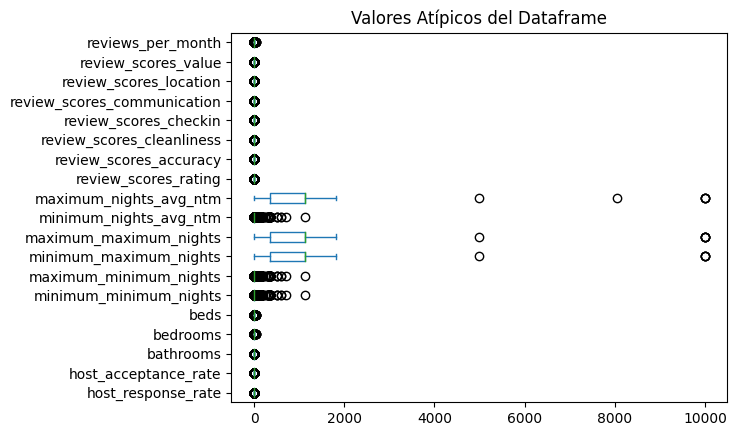

In [21]:
#Cercas Tukey 
fig = plt.figure(figsize =(15, 8))
float_df2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [22]:
y=float_df2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate                1.09000
host_acceptance_rate              1.15000
bathrooms                         3.50000
bedrooms                          3.50000
beds                              3.50000
minimum_minimum_nights            3.50000
maximum_minimum_nights            6.00000
minimum_maximum_nights         2265.00000
maximum_maximum_nights         2265.00000
minimum_nights_avg_ntm            5.75000
maximum_nights_avg_ntm         2265.00000
review_scores_rating              5.32500
review_scores_accuracy            5.26500
review_scores_cleanliness         5.35000
review_scores_checkin             5.30000
review_scores_communication       5.30000
review_scores_location            5.30000
review_scores_value               5.26500
reviews_per_month                 4.48125
dtype: float64
Limite inferior permitido host_response_rate               0.85000
host_acceptance_rate             0.75000
bathrooms                       -0.50000
bedrooms    

In [23]:
#Datos limpios
float_df3= float_df2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
float_df3

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,0.90,1.0,1.0,1.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,0.9,0.90,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,1.0,0.90,2.0,3.0,3.0,NaN,NaN,1125.0,1125.0,NaN,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,0.9,0.90,1.0,1.0,1.0,1.0,1.0,7.0,7.0,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,1.0,0.86,NaN,NaN,NaN,1.0,1.0,365.0,365.0,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24220,0.9,0.90,1.0,2.0,3.0,1.0,1.0,365.0,365.0,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24221,0.9,0.96,2.0,2.0,1.0,NaN,5.0,365.0,365.0,5.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24222,1.0,1.00,1.0,1.0,1.0,1.0,1.0,365.0,365.0,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


In [24]:
valores_nulos=float_df3.isnull().sum()
valores_nulos

host_response_rate             1758
host_acceptance_rate           2224
bathrooms                       506
bedrooms                        640
beds                           2347
minimum_minimum_nights         3082
maximum_minimum_nights         1895
minimum_maximum_nights            5
maximum_maximum_nights            6
minimum_nights_avg_ntm         1929
maximum_nights_avg_ntm            6
review_scores_rating           1588
review_scores_accuracy         2150
review_scores_cleanliness      1510
review_scores_checkin          1226
review_scores_communication    1498
review_scores_location         1209
review_scores_value            1859
reviews_per_month              1373
dtype: int64

In [25]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
float_df4=float_df3.copy()
float_df4=float_df3.fillna(round(float_df3.mean(),1))
float_df4

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,0.90,1.0,1.0,1.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.19
1,0.9,0.90,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.54
2,1.0,0.90,2.0,3.0,3.0,1.6,1.9,1125.0,1125.0,1.8,1125.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.31
3,0.9,0.90,1.0,1.0,1.0,1.0,1.0,7.0,7.0,1.0,7.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
4,1.0,0.86,1.3,1.4,1.6,1.0,1.0,365.0,365.0,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,1.0,1.0,1.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24220,0.9,0.90,1.0,2.0,3.0,1.0,1.0,365.0,365.0,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24221,0.9,0.96,2.0,2.0,1.0,1.6,5.0,365.0,365.0,5.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70
24222,1.0,1.00,1.0,1.0,1.0,1.0,1.0,365.0,365.0,1.0,365.0,4.70,4.80,4.70,4.80,4.80,4.80,4.70,1.70


In [26]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=float_df4.isnull().sum()
valores_nulos

host_response_rate             0
host_acceptance_rate           0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

Data Frame Float está limpio.

In [27]:
##Unimos los DF
DB_Limpio = pd.concat([df_NoNull,float_df4, object_df3], axis=1)
DB_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   picture_url                                   24224 non-null  object 
 6   host_id                                       24224 non-null  int64  
 7   host_url                                      24224 non-null  object 
 8   host_name                                     24224 non-null  object 
 9   host_since                                    24224 non-null 

<Figure size 1500x800 with 0 Axes>

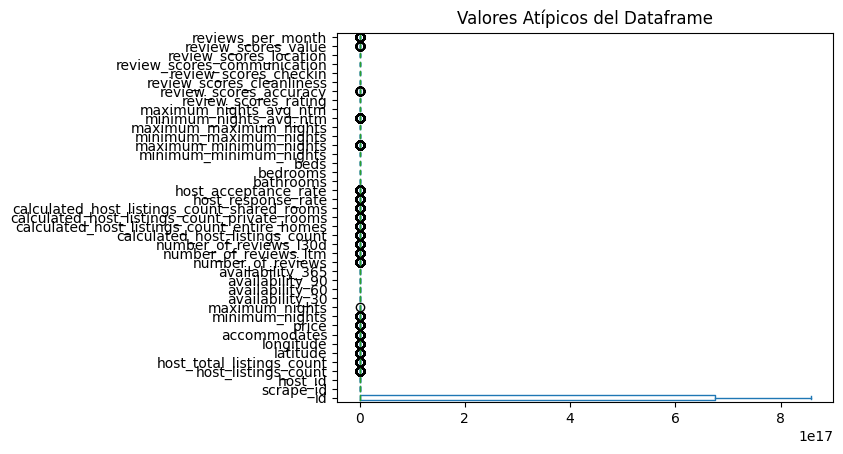

In [28]:
fig = plt.figure(figsize =(15, 8))
DB_Limpio.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [29]:
DB_Limpio.to_csv("Limpio2.csv")

**ETAPA 2**

Primer Filtro, selección de la variable host_response_rate con valores mayores al 50%.

In [30]:
filtro1=DB_Limpio[(DB_Limpio["host_response_rate"] >0.5)]
filtro1.to_csv("Filtro1.csv")

Segundo filtro, selección de los registros con categoría "superhost"

In [31]:
filtro2=DB_Limpio[(DB_Limpio["host_is_superhost"] == "t")]
filtro2.to_csv("Filtro2.csv")

Tercer filtro, registros sin identidad

In [32]:
filtro3=DB_Limpio[(DB_Limpio["host_identity_verified"]=="f")]
filtro3.to_csv("filtro3.csv")

Cuarto filtro, variable propertytype iguales a Private room y Hotel room

In [33]:
filtro4=DB_Limpio[(DB_Limpio["property_type"] == "Private room")|(DB_Limpio["property_type"] == "Hotel room") ]
filtro4.to_csv("filtro4.csv")

Quinto filtro, bathrooms > 1

In [34]:
filtro5=DB_Limpio[(DB_Limpio["bathrooms"] >1) ]
filtro5.to_csv("filtro5.csv")

Sexto filtro, precios mayor a $10,000 y de tipo "Entire home"

In [35]:
filtro6=DB_Limpio[(DB_Limpio["price"] > 10000)&(DB_Limpio["room_type"] == "Entire home/apt") ]
filtro6.to_csv("filtro6.csv")

Séptimo filtro, donde las review_scores_cleanliness son mayores a 4.5

In [36]:
filtro7=DB_Limpio[(DB_Limpio["review_scores_cleanliness"] > 4.5)]
filtro7.to_csv("filtro7.csv")


Octavo filtro, utilizando la variable "review_scores_value" buscamos una puntuación mayor a 4.9

In [37]:
filtro8=DB_Limpio[(DB_Limpio["review_scores_value"] >4.9)]
filtro8.to_csv("filtro8.csv")

Noveno filtro, utilizamos la variable "availability_365" con la finalidad de bucar un lugar que esté disponible menos de 100 días al año.

In [38]:
filtro9=DB_Limpio[(DB_Limpio["availability_365"] < 100)]
filtro9.to_csv("filtro9.csv")

Décimo filtro, utilizando la variable "host_response_time" nos interesa saber el host cuya respuesta sea "within an hour"

In [39]:
filtro10=DB_Limpio[(DB_Limpio["host_response_time"]=="within an hour")]
filtro10.to_csv("filtro10.csv")

**FASE 3**
Identificamos las variables deseadas.

In [40]:
DB_Limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   picture_url                                   24224 non-null  object 
 6   host_id                                       24224 non-null  int64  
 7   host_url                                      24224 non-null  object 
 8   host_name                                     24224 non-null  object 
 9   host_since                                    24224 non-null 

In [41]:
Fase3=DB_Limpio.iloc[ : ,[65,42,16,20,33,31,54,56,57,58]]
Fase3

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
0,within a day,0.90,f,Entire loft,21,324,4.95,4.95,5.00,4.86
1,within an hour,0.90,t,Entire guest suite,61,346,4.88,5.00,4.95,4.84
2,within an hour,0.90,t,Entire rental unit,39,87,4.71,4.92,4.58,4.71
3,within an hour,0.90,t,Entire villa,0,363,4.70,4.80,4.80,4.70
4,within an hour,0.86,t,Entire home,64,357,4.70,4.78,4.98,4.48
...,...,...,...,...,...,...,...,...,...,...
24219,within an hour,1.00,t,Entire rental unit,0,352,4.70,4.80,4.80,4.70
24220,within an hour,0.90,t,Entire rental unit,0,365,4.70,4.80,4.80,4.70
24221,within an hour,0.96,t,Private room in home,0,180,4.70,4.80,4.80,4.70
24222,within an hour,1.00,t,Entire rental unit,0,344,4.70,4.80,4.80,4.70


Análisis sobre valores cualitativos

In [42]:
#host_response_time
tabla1=freq_tbl(Fase3["host_response_time"])
tabla1


,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,19442,0.802592,0.802592
1,within a few hours,2283,0.094245,0.896838
2,within a day,1662,0.068610,0.965447
3,a few days or more,837,0.034553,1.000000


In [43]:
fg=tabla1.set_index("host_response_time")
fg

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,19442,0.802592,0.802592
within a few hours,2283,0.094245,0.896838
within a day,1662,0.068610,0.965447
a few days or more,837,0.034553,1.000000


Text(0, 0.5, 'Frecuencia')

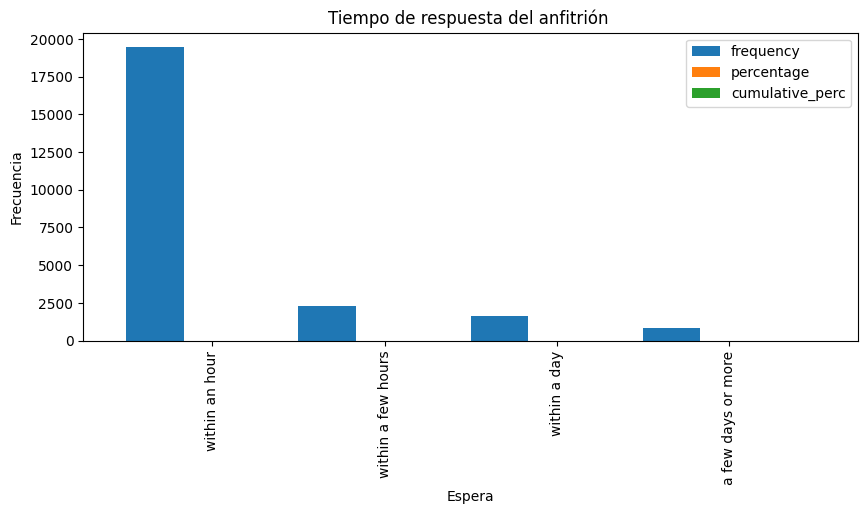

In [44]:
fg.plot(kind="bar",width=1,figsize=(10,4))
plt.title("Tiempo de respuesta del anfitrión ")
plt.xlabel("Espera")
plt.ylabel("Frecuencia")


In [45]:
#host_identity_verified
tabla2=freq_tbl(Fase3["host_identity_verified"])
tabla2

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,22301,0.920616,0.920616
1,f,1923,0.079384,1.000000


In [46]:
sg=tabla2.set_index("host_identity_verified")
sg

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,22301,0.920616,0.920616
f,1923,0.079384,1.000000


Text(0, 0.5, 'Frecuencia')

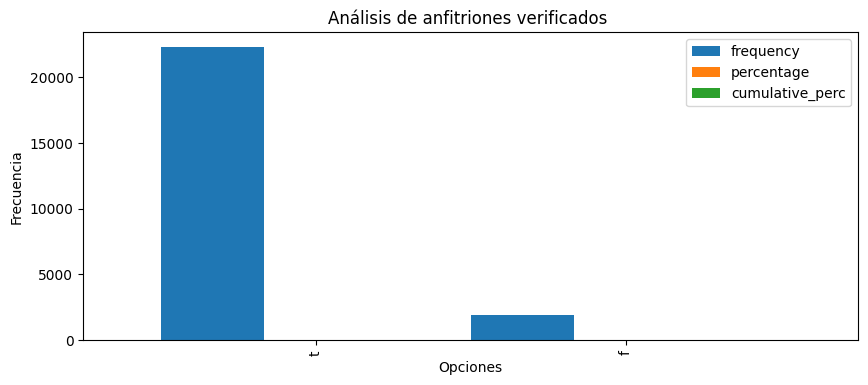

In [47]:
sg.plot(kind="bar",width=1,figsize=(10,4))
plt.title("Análisis de anfitriones verificados ")
plt.xlabel("Opciones")
plt.ylabel("Frecuencia")

In [48]:
#property_type
tabla3=freq_tbl(Fase3["property_type"])
tabla3

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8145,0.336237,0.336237
1,Entire condo,3363,0.138829,0.475066
2,Private room in rental unit,2860,0.118065,0.593131
3,Private room in home,2009,0.082934,0.676065
4,Entire loft,1584,0.065390,0.741455
...,...,...,...,...
87,Entire in-law,1,0.000041,0.999835
88,Private room in barn,1,0.000041,0.999876
89,Shared room in tiny home,1,0.000041,0.999917
90,Private room in earthen home,1,0.000041,0.999959


In [49]:
#filtro
tabla3=tabla3[(tabla3["frequency"]>100)]
tabla3

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8145,0.336237,0.336237
1,Entire condo,3363,0.138829,0.475066
2,Private room in rental unit,2860,0.118065,0.593131
3,Private room in home,2009,0.082934,0.676065
4,Entire loft,1584,0.065390,0.741455
5,Entire serviced apartment,1067,0.044047,0.785502
6,Private room in condo,917,0.037855,0.823357
7,Entire home,661,0.027287,0.850644
8,Room in hotel,381,0.015728,0.866372
9,Private room in guest suite,297,0.012261,0.878633


In [50]:
tg=tabla3.set_index("property_type")
tg

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8145,0.336237,0.336237
Entire condo,3363,0.138829,0.475066
Private room in rental unit,2860,0.118065,0.593131
Private room in home,2009,0.082934,0.676065
Entire loft,1584,0.065390,0.741455
Entire serviced apartment,1067,0.044047,0.785502
Private room in condo,917,0.037855,0.823357
Entire home,661,0.027287,0.850644
Room in hotel,381,0.015728,0.866372


Text(0, 0.5, 'Frecuencia')

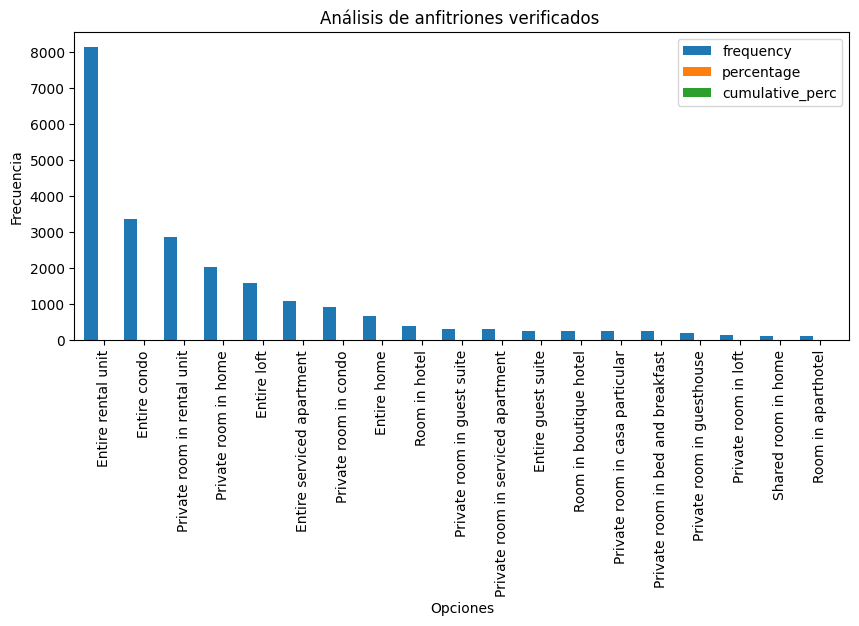

In [51]:
tg.plot(kind="bar",width=1,figsize=(10,4))
plt.title("Análisis de anfitriones verificados ")
plt.xlabel("Opciones")
plt.ylabel("Frecuencia")

Análisis sobre valores numéricos

In [52]:
## Resumen estadísitico sobre variables cuantitativas.
Fase3.describe()

,host_acceptance_rate,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,0.970928,36.585205,245.593791,4.817696,4.887060,4.886408,4.796492
std,0.051598,63.175200,123.902902,0.155118,0.114509,0.115036,0.148140
min,0.750000,0.000000,0.000000,4.320000,4.500000,4.500000,4.350000
25%,0.970000,2.000000,144.000000,4.700000,4.800000,4.800000,4.700000
50%,1.000000,12.000000,304.000000,4.820000,4.900000,4.910000,4.800000
75%,1.000000,43.000000,356.000000,4.960000,5.000000,5.000000,4.920000
max,1.000000,1092.000000,365.000000,5.000000,5.000000,5.000000,5.000000


**DATOS CATEGÓRICOS**

In [53]:
aceptacion=Fase3["host_acceptance_rate"]

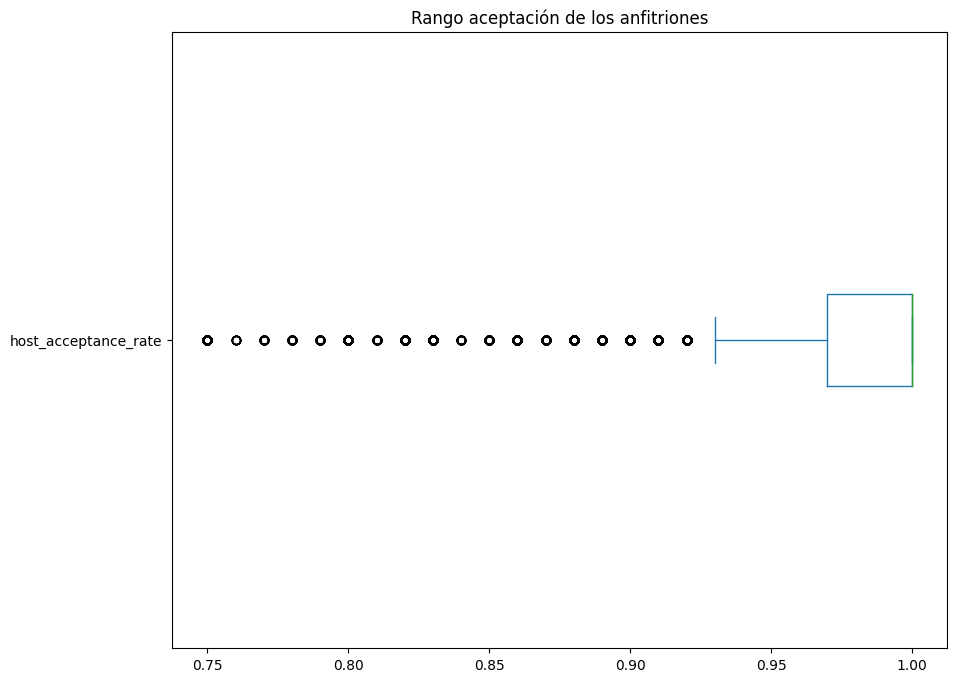

In [57]:
#Análisis host_acceptance_rate
fig = plt.figure(figsize =(10, 8))
aceptacion.plot(kind='box', vert=False)
plt.title("Rango aceptación de los anfitriones")
plt.show()

In [55]:
reviews=Fase3["number_of_reviews"]

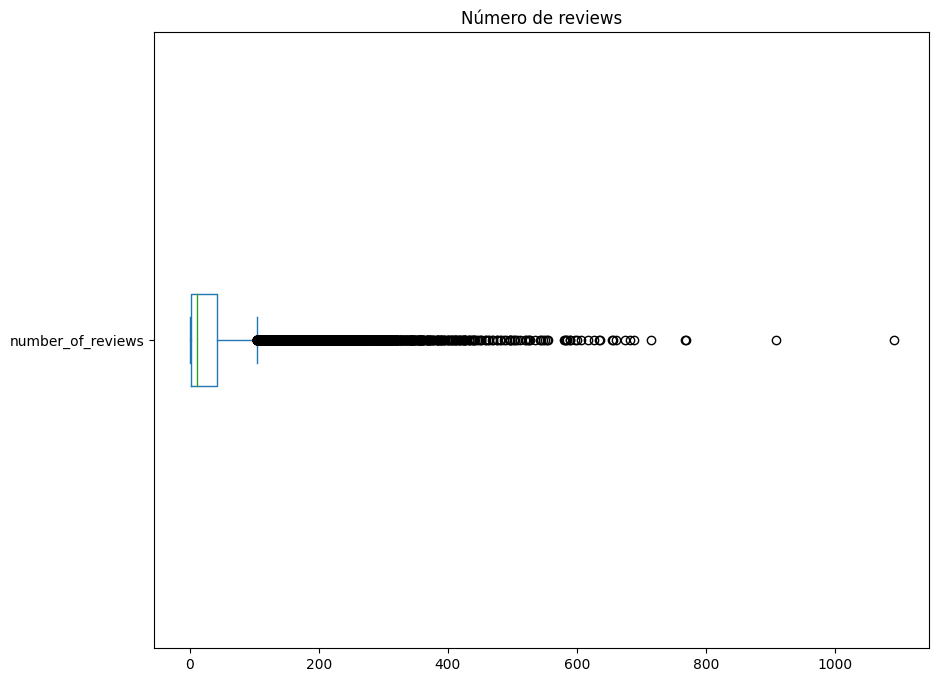

In [58]:
#Análisis number_of_reviews
fig = plt.figure(figsize =(10, 8))
reviews.plot(kind='box', vert=False)
plt.title("Número de reviews")
plt.show()

In [59]:
disponibilidad=Fase3["availability_365"]

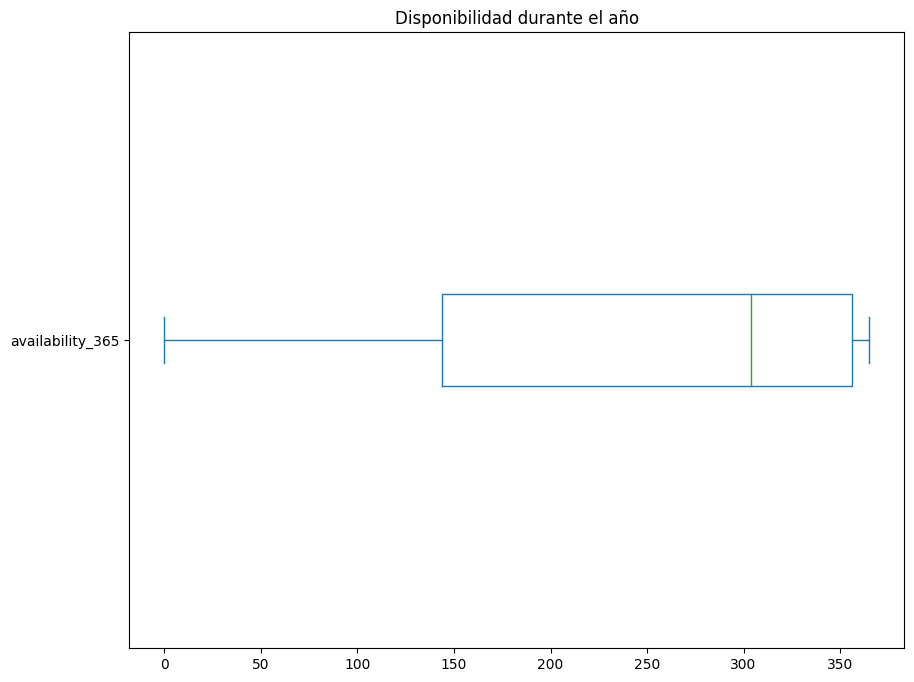

In [62]:
#Análisis availability_365
fig = plt.figure(figsize =(10, 8))
disponibilidad.plot(kind='box', vert=False)
plt.title("Disponibilidad durante el año")
plt.show()

In [63]:
limpieza=Fase3["review_scores_cleanliness"]

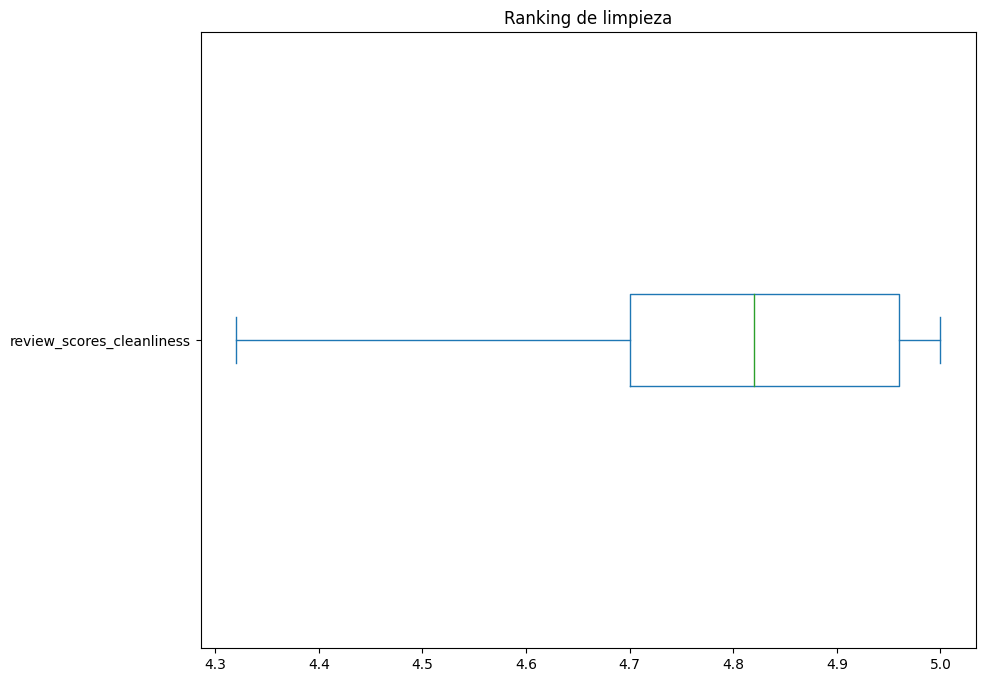

In [65]:
#Análisis review_scores_cleanliness
fig = plt.figure(figsize =(10, 8))
limpieza.plot(kind='box', vert=False)
plt.title("Ranking de limpieza")
plt.show()

In [66]:
comunicacion=Fase3["review_scores_communication"]

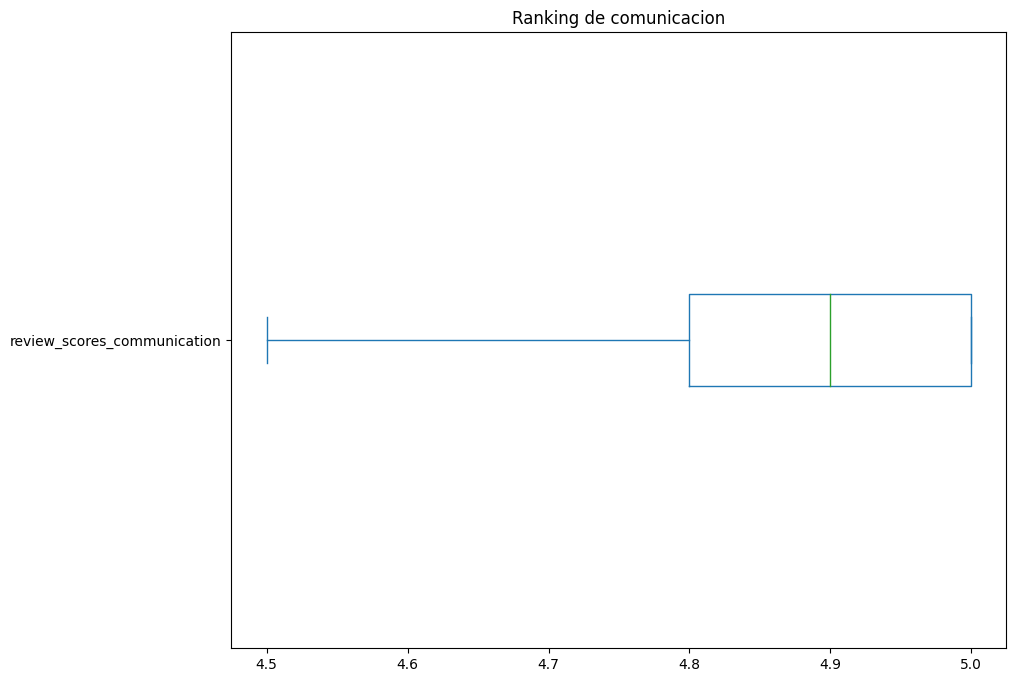

In [68]:
#Análisis review_scores_communication
fig = plt.figure(figsize =(10, 8))
comunicacion.plot(kind='box', vert=False)
plt.title("Ranking de comunicacion")
plt.show()

In [70]:
locacion=Fase3["review_scores_location"]


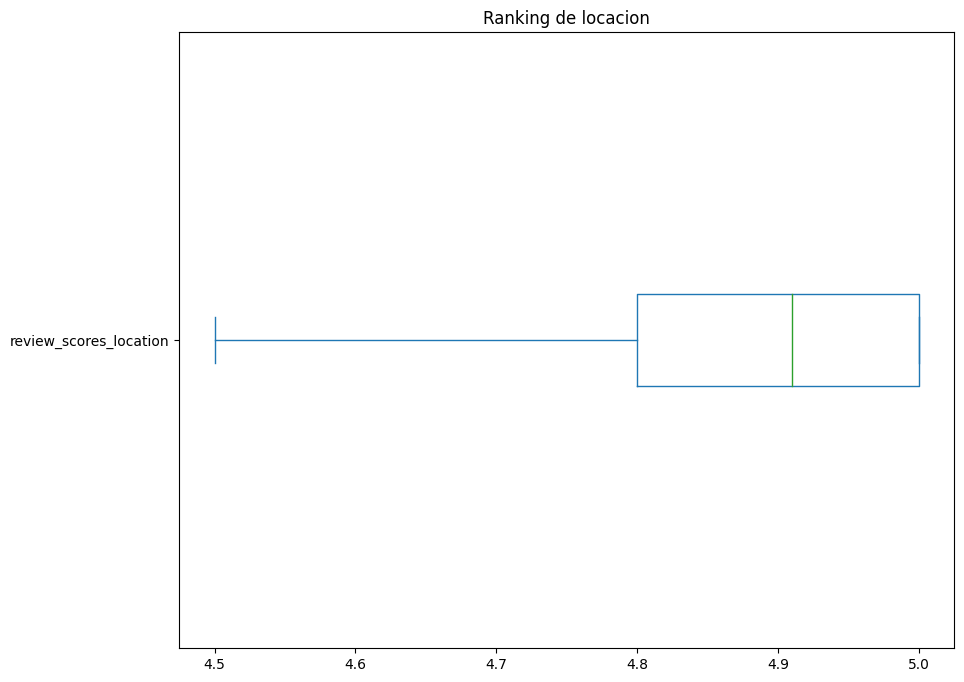

In [72]:
#Análisis review_scores_location
fig = plt.figure(figsize =(10, 8))
locacion.plot(kind='box', vert=False)
plt.title("Ranking de locacion")
plt.show()

In [73]:
puntacion=Fase3["review_scores_value"]

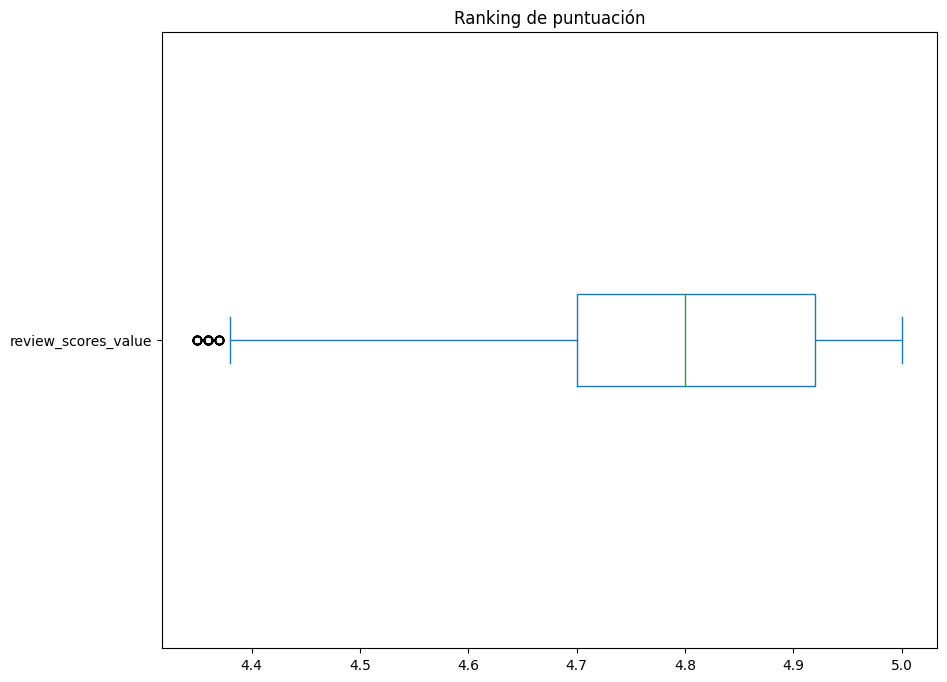

In [74]:
#Análisis review_scores_value
fig = plt.figure(figsize =(10, 8))
puntacion.plot(kind='box', vert=False)
plt.title("Ranking de puntuación")
plt.show()